# DATA DESCRIPTION

This dataset includes details of Insurance fraud i.e Insurance claim fraud detection. Following are the independent and dependent variables present in then Dataset:

- months_as_customer
- age,policy_number
- policy_bind_date
- policy_state
- policy_csl
- policy_deductable
- policy_annual_premium
- umbrella_limit
- insured_zip
- insured_sex
- insured_education_level
- insured_occupation
- insured_hobbies
- insured_relationship
- capital-gains
- capital-loss
- incident_date
- incident_type
- collision_type
- incident_severity
- authorities_contacted
- incident_state
- incident_city
- incident_location
- incident_hour_of_the_day
- number_of_vehicles_involved
- property_damage
- bodily_injuries
- witnesses
- police_report_available
- total_claim_amount
- injury_claim
- property_claim
- vehicle_claim
- auto_make
- auto_model 
- auto_year

Target Variable:
- fraud_reported

# PROBLEM STATEMENT :

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, we are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, we will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

So, from the problem statement and the Dataset we can understand that it is a "Classification problem". so we will be using some Classification algorithms to make our model and then use GRIDSEARCHCV for hypeparameter tuning and save the predicted model using pkl.

So, from the problem statement and the Dataset we can understand that it is a "Classification problem". so we will be using some Classification algorithms to make our model and then use GRIDSEARCHCV for hypeparameter tuning and save the predicted model using pkl.

And also as this data set is imbalanced we will be using SMOTE for Sampling of our Data

# Importing the needed Libraries

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import sklearn


import warnings
warnings.filterwarnings('ignore')

In [9]:
# Import libraries for data processing & modeling

from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier



# Loading the Data

In [10]:
df_train = pd.read_csv('insurance_claim.csv')


# Data Assessing

In [11]:
# let's take a look at the data
pd.set_option('display.max_columns', None)


In [12]:
df_train.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [14]:
#Lets see the dimension of both the training and test sets
df_train.shape

(1000, 40)

So from the above we can see that there are 1000 rows and 40 columns.

In [16]:
#Lets see the columns of the dataset
df_train.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

We have 39 independent variables and 1 target variable, i.e. fraud_reported in the training dataset.

In [18]:
#Lets analyse a bit more with the describe function to check for skewness,outliers etc
df_train.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


So from the above we can see thate there are outliers in the dataset, as well as we need to scale the dataset even, which we will deal with later.

In [19]:
#Lets check for null values
df_train.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

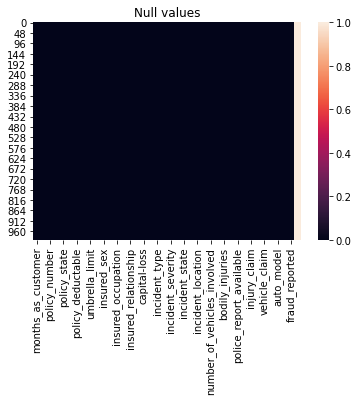

In [22]:
sns.heatmap(df_train.isnull())
plt.title('Null values')
plt.show()

From the above we can see that there are no null values in the dataset.

In [23]:
# Check for missing data 
train_na = (df_train.isnull().sum() / len(df_train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)[:30]
miss_train = pd.DataFrame({'Train Missing Ratio' :train_na})
miss_train.head()

,Train Missing Ratio
_c39,100.0


In [25]:
# Unique values in each variables
df_train.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

A simple look of data will shpw that few features have '?' as values. For example Collision_type has 178 such values which need to be replaced.

In [28]:
df_train = df_train.replace('?',np.NaN)
df_train.isnull().any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

In [30]:
df_train.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Lets treat some of the missing values

In [31]:
# Replace the '?' with mode of collision_type feature as it is categorical and we are unaware of the type.
df_train['collision_type'].fillna(df_train['collision_type'].mode()[0], inplace = True)

# Replace missing information as 'No' for property_damage. Feature can have only 2 possibles values. Either Yes or No. 
# If information is nor available we will assume it was not reported.
df_train['property_damage'].fillna('NO', inplace = True)

# USe the assumption above to replace missing information as 'No' for police_report_available
df_train['police_report_available'].fillna('NO', inplace = True)

df_train.isnull().any().any()

True

the 'True' is showing for the column _c39, we will deal with it later and remove it as it doesnot have any impact on the model.


# Data Visualization

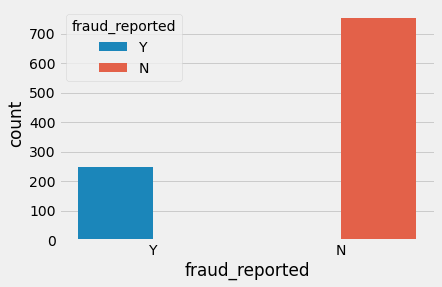

In [33]:
#to understand the variables and their impact on predictor variable (fraud_reported)
plt.style.use('fivethirtyeight')
ax=sns.countplot(x='fraud_reported', data = df_train , hue='fraud_reported')

From above plot, like most fraud data-sets, the label distribution looks skewed. Let’s check some numbers to understand more about this.

In [35]:
df_train['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

Here we see that almost 25% of data-set are fraud reported. Let’s try to look for an indicative variable. Let’s analyze location. This data-set only has information from the mid-Atlantic states from the USA.


In [36]:
df_train['incident_state'].value_counts()

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64

In [38]:
import joypy 

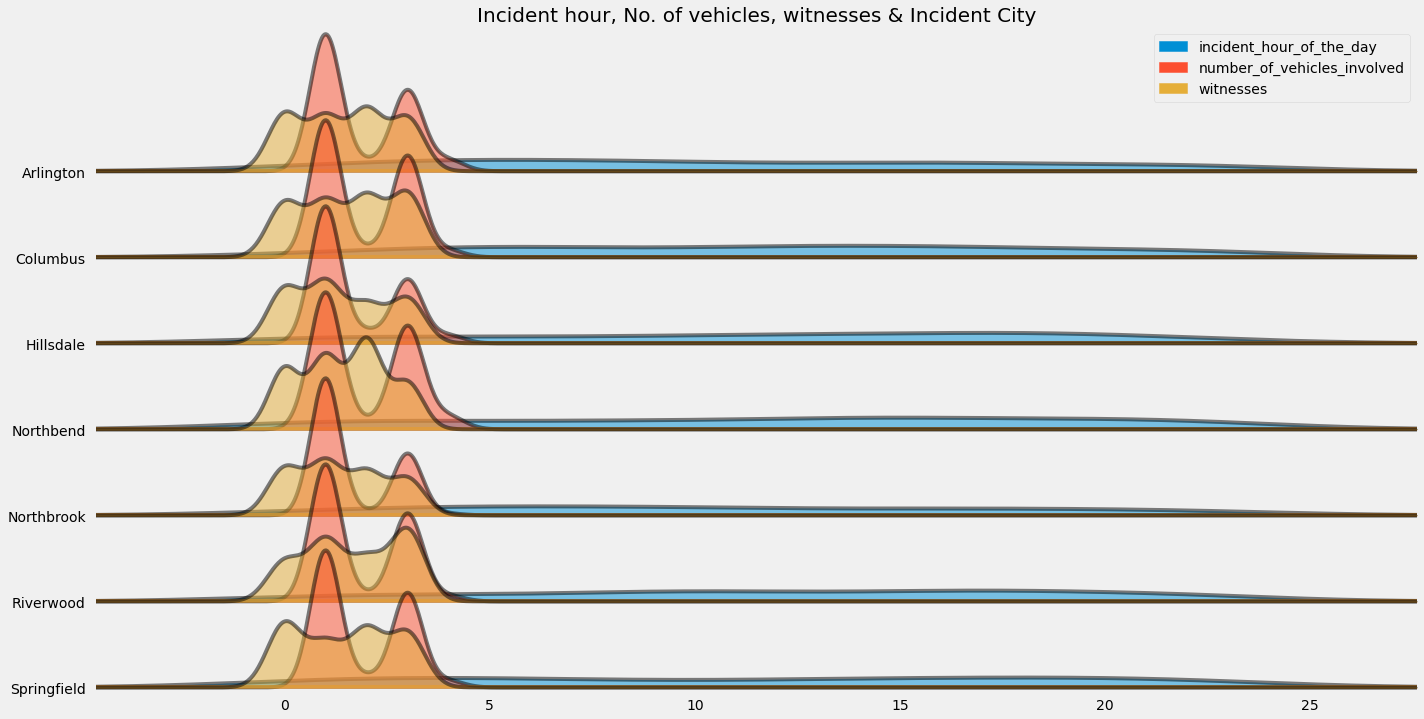

In [39]:
fig, axes = joypy.joyplot(df_train,
                         column = ['incident_hour_of_the_day','number_of_vehicles_involved', 'witnesses'],
                         by = 'incident_city',
                         ylim = 'own',
                         figsize = (20, 10),
                         alpha = 0.5, 
                         legend = True)

plt.title('Incident hour, No. of vehicles, witnesses & Incident City', fontsize = 20)
plt.show()


In [41]:
# let's encode the fraud reported to numerical values
df_train['fraud_reported'] = df_train['fraud_reported'].replace(('Y','N'),(1,0))

,fraud_reported
insured_sex,
FEMALE,537
MALE,463


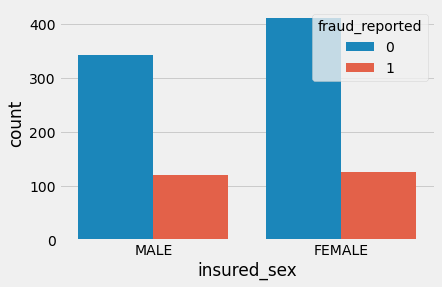

In [42]:
# Count the fraudulent transactions by gender
ax = sns.countplot(x="insured_sex", hue="fraud_reported", data=df_train)

# Analyze fraudulent transactions by gender
df_train[["insured_sex", "fraud_reported"]].groupby(['insured_sex']).count().sort_values(by='fraud_reported', ascending=False)

,fraud_reported
insured_sex,
MALE,0.261339
FEMALE,0.234637


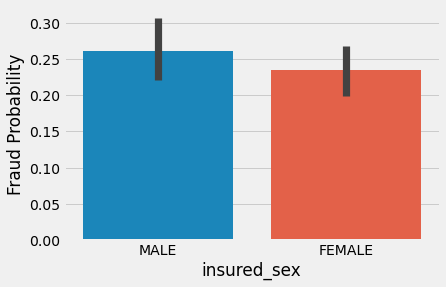

In [45]:
# Analyze the Probability of fraud by Gender
g = sns.barplot(x="insured_sex",y="fraud_reported",data=df_train)
g = g.set_ylabel("Fraud Probability")
df_train[["insured_sex", "fraud_reported"]].groupby(['insured_sex']).mean().sort_values(by='fraud_reported', ascending=False)

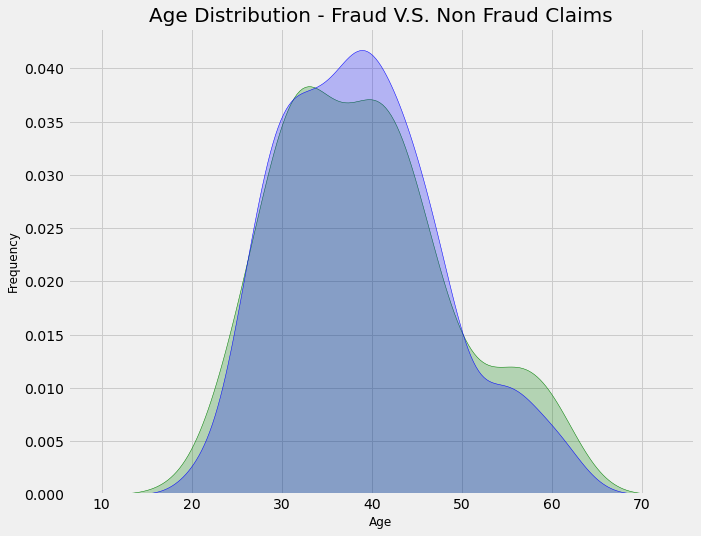

In [47]:
# Let's explore the distribution of age by response variable (Fraud Reported)
fig = plt.figure(figsize=(10,8),)
axis = sns.kdeplot(df_train.loc[(df_train['fraud_reported'] == 1),'age'] , color='g',shade=True, label='Fraudulent Claims')
axis = sns.kdeplot(df_train.loc[(df_train['fraud_reported'] == 0),'age'] , color='b',shade=True,label='Nonfraudulent Claims')
plt.title('Age Distribution - Fraud V.S. Non Fraud Claims', fontsize = 20)
plt.xlabel("Age", fontsize = 12)
plt.ylabel('Frequency', fontsize = 12);

,fraud_reported
insured_education_level,
PhD,0.264000
MD,0.263889
College,0.262295
JD,0.260870
Associate,0.234483
High School,0.225000
Masters,0.223776


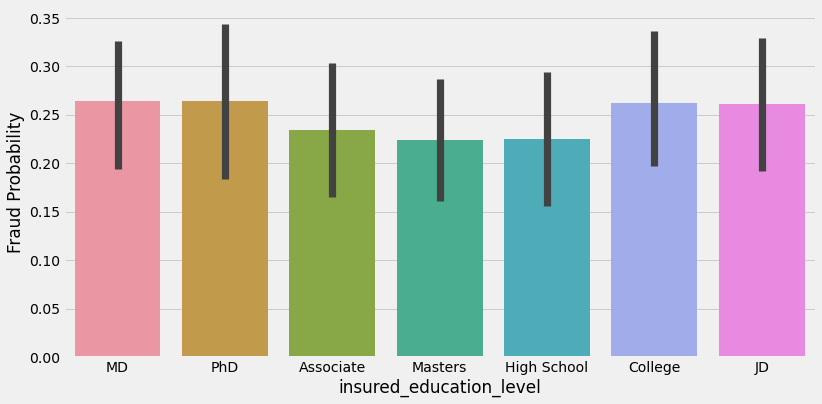

In [48]:
# Analyze the Probability of fraud by education level
fig, ax = plt.subplots(figsize=(12,6))
g = sns.barplot(x="insured_education_level",y="fraud_reported",data=df_train)
g = g.set_ylabel("Fraud Probability")
df_train[["insured_education_level", "fraud_reported"]].groupby(['insured_education_level']).mean().sort_values(by='fraud_reported', ascending=False)

,fraud_reported
insured_relationship,
own-child,183
other-relative,177
not-in-family,174
husband,170
wife,155
unmarried,141


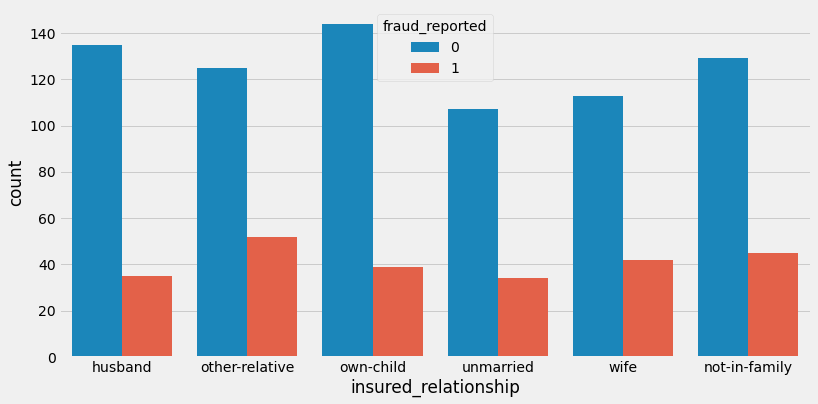

In [49]:
# Count the fraudulent transactions by insured_relationship
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(x="insured_relationship", hue="fraud_reported", data=df_train)

# Analyze the fraudulent transactions by insured_relationship
df_train[["insured_relationship", "fraud_reported"]].groupby(['insured_relationship']).count().sort_values(by='fraud_reported', ascending=False)


,fraud_reported
insured_education_level,
JD,161
High School,160
Associate,145
MD,144
Masters,143
PhD,125
College,122


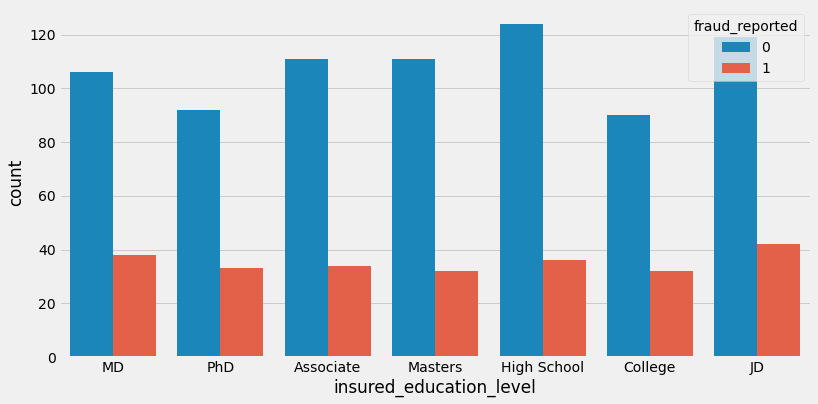

In [50]:
# Count the fraudulent transactions by insured_education_level
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(x="insured_education_level", hue="fraud_reported", data=df_train)

# Analyze the fraudulent transactions by insured_education_level
df_train[["insured_education_level", "fraud_reported"]].groupby(['insured_education_level']).count().sort_values(by='fraud_reported', ascending=False)

,fraud_reported
incident_type,
Single Vehicle Collision,0.290323
Multi-vehicle Collision,0.272076
Parked Car,0.095238
Vehicle Theft,0.085106


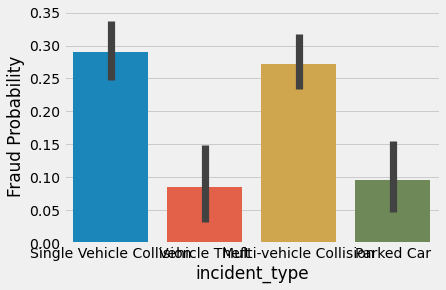

In [53]:
# Analyze the Probability of fraud by incident_type

g = sns.barplot(x="incident_type",y="fraud_reported",data=df_train)
g = g.set_ylabel("Fraud Probability")
df_train[["incident_type", "fraud_reported"]].groupby(['incident_type']).mean().sort_values(by='fraud_reported', ascending=False)

,fraud_reported
insured_relationship,
other-relative,0.293785
wife,0.270968
not-in-family,0.258621
unmarried,0.241135
own-child,0.213115
husband,0.205882


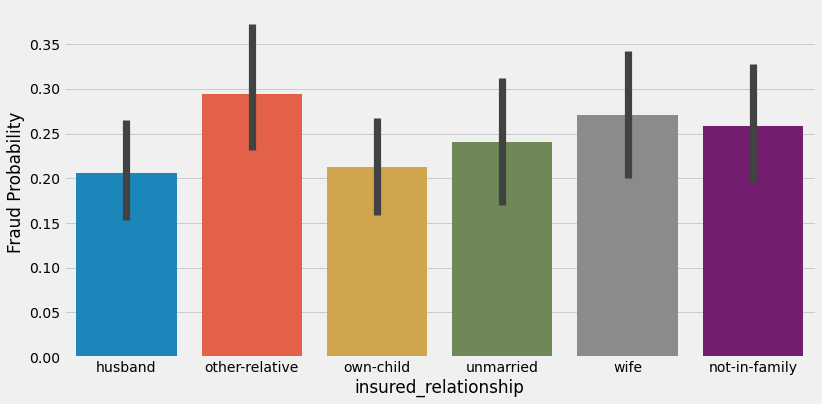

In [52]:
# Analyze the Probability of fraud by insured_relationship
fig, ax = plt.subplots(figsize=(12,6))
g = sns.barplot(x="insured_relationship",y="fraud_reported",data=df_train)
g = g.set_ylabel("Fraud Probability")
df_train[["insured_relationship", "fraud_reported"]].groupby(['insured_relationship']).mean().sort_values(by='fraud_reported', ascending=False)


,fraud_reported
collision_type,
Front Collision,0.275591
Side Collision,0.253623
Rear Collision,0.227660


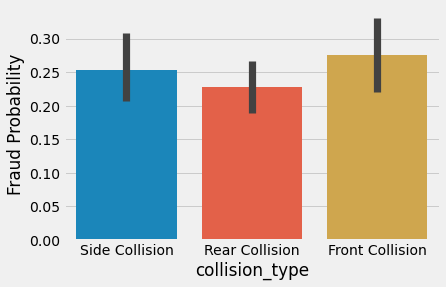

In [57]:
# Analyze the Probability of fraud by incident_type

g = sns.barplot(x="collision_type",y="fraud_reported",data=df_train)
g = g.set_ylabel("Fraud Probability")
df_train[["collision_type", "fraud_reported"]].groupby(['collision_type']).mean().sort_values(by='fraud_reported', ascending=False)

,fraud_reported
incident_severity,
Major Damage,0.605072
Total Loss,0.128571
Minor Damage,0.107345
Trivial Damage,0.066667


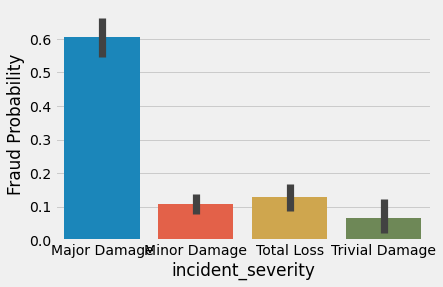

In [60]:
# Analyze the Probability of fraud by incident_type

g = sns.barplot(x="incident_severity",y="fraud_reported",data=df_train)
g = g.set_ylabel("Fraud Probability")
df_train[["incident_severity", "fraud_reported"]].groupby(['incident_severity']).mean().sort_values(by='fraud_reported', ascending=False)

,fraud_reported
incident_state,
OH,0.434783
NC,0.309091
SC,0.294355
PA,0.266667
VA,0.227273
NY,0.221374
WV,0.179724


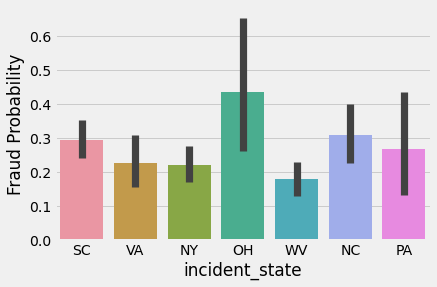

In [61]:
#Analyze the Probability of fraud by incident_state

g = sns.barplot(x="incident_state",y="fraud_reported",data=df_train)
g = g.set_ylabel("Fraud Probability")
df_train[["incident_state", "fraud_reported"]].groupby(['incident_state']).mean().sort_values(by='fraud_reported', ascending=False)

,fraud_reported
auto_make,
Mercedes,0.338462
Ford,0.305556
Audi,0.304348
Volkswagen,0.279412
BMW,0.277778
Chevrolet,0.276316
Honda,0.254545
Dodge,0.250000
Suburu,0.237500


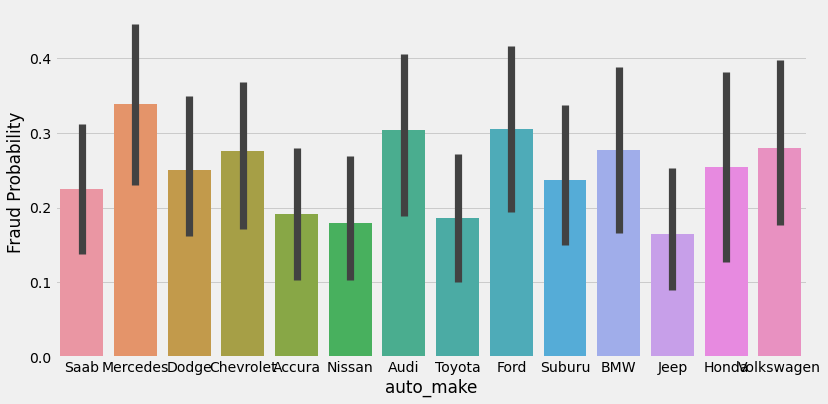

In [62]:
# Analyze the Probability of fraud by incident_state
fig, ax = plt.subplots(figsize=(12,6))
g = sns.barplot(x="auto_make",y="fraud_reported",data=df_train)
g = g.set_ylabel("Fraud Probability")
df_train[["auto_make", "fraud_reported"]].groupby(['auto_make']).mean().sort_values(by='fraud_reported', ascending=False)

# Data Processing

In [63]:
#first lets drop the not needed _c39column
df_train.drop('_c39',inplace=True,axis=1)

In [65]:
bins = [-1, 3, 6, 9, 12, 17, 20, 24] 
catg = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
df_train['incident_period'] = pd.cut(df_train.incident_hour_of_the_day, bins, labels=catg).astype(object)
df_train[['incident_hour_of_the_day', 'incident_period']].head(20)

,incident_hour_of_the_day,incident_period
0,5,early_morning
1,8,morning
2,7,morning
3,5,early_morning
4,20,evening
5,19,evening
6,0,past_midnight
7,23,night
8,21,night
9,14,afternoon


In [66]:
#Transforming some numerical variables that are really categorical
df_train['number_of_vehicles_involved'] = df_train['number_of_vehicles_involved'].apply(str)
df_train['witnesses'] = df_train['witnesses'].apply(str)
df_train['bodily_injuries'] = df_train['bodily_injuries'].apply(str)



In [68]:
dummies = pd.get_dummies(df_train[['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 
                                'insured_hobbies', 'insured_relationship', 'incident_type',
                                'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state',
                                'incident_city', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
                                'witnesses', 'police_report_available', 'auto_make', 'auto_model', 'incident_period']])

dummies.head(10)

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,number_of_vehicles_involved_1,number_of_vehicles_involved_2,number_of_vehicles_involved_3,number_of_vehicles_involved_4,property_damage_NO,property_damage_YES,bodily_injuries_0,bodily_injuries_1,bodily_injuries_2,witnesses_0,witnesses_1,witnesses_2,witnesses_3,police_report_available_NO,police_report_available_YES,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,incident_period_afternoon,incident_period_early_morning,incident_period_evening,incident_period_fore-noon,incident_period_morning,incident_period_night,incident_period_past_midnight
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,

In [69]:
#let's drop unnecessary variables

df = df_train.drop(columns = ['policy_number', 'policy_csl','insured_zip','policy_bind_date', 'incident_date', 
                              'incident_location', 'auto_year', 'incident_hour_of_the_day', 'policy_state', 
                              'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies',
                              'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
                              'authorities_contacted', 'incident_state', 'incident_city', 'number_of_vehicles_involved',
                              'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available',
                              'auto_make', 'auto_model', 'incident_period'])

In [70]:
x = pd.concat([dummies, df], axis=1)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 169 entries, policy_state_IL to fraud_reported
dtypes: float64(1), int64(11), uint8(157)
memory usage: 247.2 KB


In [71]:
#Predictor 
x_unscaled = x.iloc[:, 0:-1]

# target variable
y = x.iloc[:, -1]

In [72]:
# let's split the dataset into train and test sets

x_train, x_test, y_train, y_test = train_test_split(x_unscaled, y, test_size = 0.2, random_state = 0)

print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (800, 168)
Shape of x_test : (200, 168)
Shape of y_train : (800,)
Shape of y_test : (200,)


In [73]:
# standardize for easy computing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
Y_train= y_train

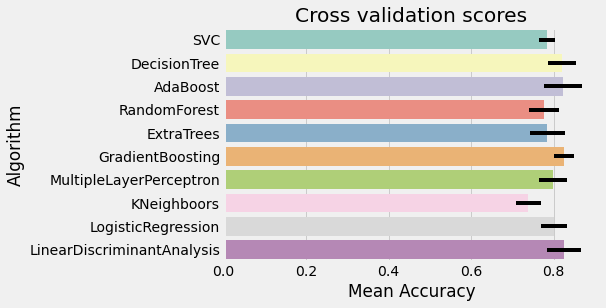

In [76]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)
# Modeling differents algorithms. Thanks Yassine for this great piece of code. 

random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, Y_train , scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

# Model Evaluation Using GridSearch CV for optimization

In [77]:
# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsadaDTC.fit(X_train,Y_train)
ada_best = gsadaDTC.best_estimator_
gsadaDTC.best_score_


Fitting 10 folds for each of 112 candidates, totalling 1120 fits


0.82125

In [78]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()
## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
                 "max_features": [1, 3, 10],
                 "min_samples_split": [2, 3, 10],
                 "min_samples_leaf": [1, 3, 10],
                 "bootstrap": [False],
                 "n_estimators" :[100,300],
                 "criterion": ["gini"]}

gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsExtC.fit(X_train,Y_train)
ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.79375

In [79]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()
## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
                 "max_features": [1, 3, 10],
                 "min_samples_split": [2, 3, 10],
                 "min_samples_leaf": [1, 3, 10],
                 "bootstrap": [False],
                 "n_estimators" :[100,300],
                 "criterion": ["gini"]}

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsRFC.fit(X_train,Y_train)
RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.78375

In [80]:
# Gradient boosting 
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1]}

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsGBC.fit(X_train,Y_train)
GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


0.8025

In [81]:
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsSVMC.fit(X_train,Y_train)
SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


0.835

Training Accuracy:  0.9475
Testing Accuarcy:  0.83
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       143
           1       0.79      0.54      0.65        57

    accuracy                           0.83       200
   macro avg       0.82      0.74      0.77       200
weighted avg       0.83      0.83      0.82       200



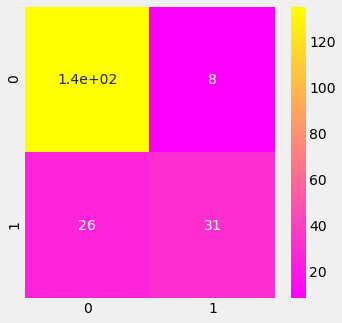

In [82]:
y_pred_rf = gsSVMC.predict(x_test)
print("Training Accuracy: ", gsSVMC.score(X_train, Y_train))
print('Testing Accuarcy: ', gsSVMC.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_rf)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'spring')
plt.show()

# Applying Over Sampling Techniques Using SMOTE

In [83]:
from imblearn.over_sampling import SMOTE
x_resample, y_resample  = SMOTE().fit_sample(x_unscaled, y.values.ravel())
print("Shape of x_resample :",x_resample.shape)
print("Shape of y_resample :",y_resample.shape)

Shape of x_resample : (1506, 168)
Shape of y_resample : (1506,)


In [84]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)
print("Shape of x_train2 :", x_train2.shape)
print("Shape of y_train2 :", y_train2.shape)
print("Shape of x_test2 :", x_test2.shape)
print("Shape of y_test2 :", y_test2.shape)

Shape of x_train2 : (1204, 168)
Shape of y_train2 : (1204,)
Shape of x_test2 : (302, 168)
Shape of y_test2 : (302,)


In [85]:
# standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train2)
x_test2 = sc.transform(x_test2)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
Training Accuracy:  0.9825581395348837
Testing Accuarcy:  0.8609271523178808
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       154
           1       0.89      0.82      0.85       148

    accuracy                           0.86       302
   macro avg       0.86      0.86      0.86       302
weighted avg       0.86      0.86      0.86       302



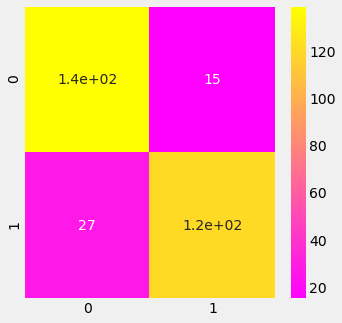

In [86]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}
gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsSVMC.fit(x_train2,y_train2)

y_pred_rf = gsSVMC.predict(x_test2)
print("Training Accuracy: ", gsSVMC.score(x_train2, y_train2))
print('Testing Accuarcy: ', gsSVMC.score(x_test2, y_test2))

# making a classification report
cr = classification_report(y_test2,  y_pred_rf)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test2, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'spring')
plt.show()

As we can see oversampling using SMOTE helped in improving the predictions all the way to almost 86.09% in test dataset

# Saving the best model using pkl.

In [87]:
import joblib
filename = 'finalized_model_fraud_detection.pkl'
joblib.dump(gsSVMC, filename)

['finalized_model_fraud_detection.pkl']